In [ ]:
# Candice Huo 1005708370
# Instructor: Professor Shion Guha
# Course code: INF2178
# Course name: Experimental Design for Data Science
# Program: MI
# Faculty of Information
# University of Toronto

# Technical Assignment 2
from google.colab import drive
drive.mount('/drive', force_remount=True)

!pip3 install pandas matplotlib seaborn geopandas
!pip3 install scikit-learn scipy bioinfokit
!pip3 install descartes

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from bioinfokit.analys import stat

Mounted at /drive
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.7/87.7 kB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for bioinfokit: filename=bioinfokit-2.1.3-py3-none-any.whl size=59056 sha256=21eb90be98f171773334d07e9518c2547da45a4713c8e1f03092ca025bdb9239
  Stored in directory: /root/.cache/pip/wheels/ac/67/a7/4e0b4172d5415933127e819d7d7080ae08a6220949ad2f6de5
Successfully built bioinfokit


In [ ]:
df = pd.read_excel('/content/INF2178_A2_data.xlsx')
df = df.drop(['_id', 'LOC_ID', 'LOC_NAME', 'ADDRESS', 'PCODE', 'BLDGNAME'], axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1063 entries, 0 to 1062
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   AUSPICE      1063 non-null   object
 1   ward         1063 non-null   int64 
 2   bldg_type    1063 non-null   object
 3   IGSPACE      1063 non-null   int64 
 4   TGSPACE      1063 non-null   int64 
 5   PGSPACE      1063 non-null   int64 
 6   KGSPACE      1063 non-null   int64 
 7   SGSPACE      1063 non-null   int64 
 8   TOTSPACE     1063 non-null   int64 
 9   subsidy      1063 non-null   object
 10  cwelcc_flag  1063 non-null   object
dtypes: int64(7), object(4)
memory usage: 91.5+ KB


In [ ]:
group1 = df[df['AUSPICE'] == 'Non Profit Agency']['TOTSPACE']
group2 = df[df['AUSPICE'] == 'Commercial Agency']['TOTSPACE']
group3 = df[df['AUSPICE'] == 'Public (City Operated) Agency']['TOTSPACE']



In [ ]:
# One way ANOVA
f_statistic, p_value = f_oneway(group1, group2, group3)
print("One-way ANOVA results:")
print("F-statistic:", f_statistic)
print("p-value:", p_value)

One-way ANOVA results:
F-statistic: 21.843051025265936
p-value: 5.057716322704697e-10


In [ ]:
# Ordinary Least Squares (OLS) model
model = ols('TOTSPACE ~ C(AUSPICE)', data=df).fit()
anova_table = anova_lm(model, typ=2)
anova_table

# ANOVA table
res = stat()
res.anova_stat(df=df, res_var='TOTSPACE', anova_model='TOTSPACE ~ C(AUSPICE)')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(AUSPICE),2.0,9.611211e+04,48056.057145,21.843051,5.057716e-10
Residual,1060.0,2.332065e+06,2200.061571,NaN,NaN


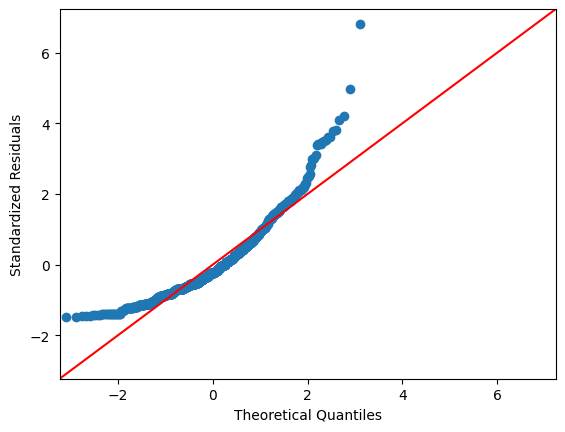

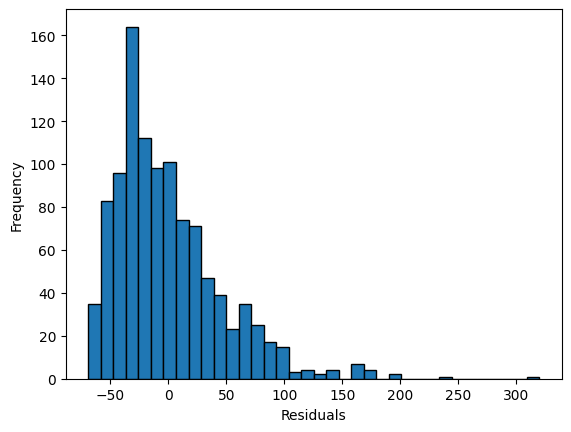

In [ ]:
#checking model diagnostics
import statsmodels.api as sm
import matplotlib.pyplot as plt

# assumption 1: res.anova_std_residuals are standardized residuals obtained from ANOVA (check above)
sm.qqplot(res.anova_std_residuals, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

# histogram
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k')
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

In [ ]:
import scipy.stats as stats

#assumption 1: residuals are normally distributed: Shapiro Wilk test
w, pvalue = stats.shapiro(model.resid)
print(w,pvalue)

0.901775598526001 1.4964898448030214e-25


In [ ]:
#assumption 2: variances are homogenous: Levene's test when the sample is not normally distributed
res.levene(df=df, res_var='TOTSPACE', xfac_var='AUSPICE')
res.levene_summary

,Parameter,Value
0,Test statistics (W),17.9271
1,Degrees of freedom (Df),2.0000
2,p value,0.0000


In [ ]:
# Fitting model
model = ols('TOTSPACE ~ C(cwelcc_flag) + C(subsidy) + C(cwelcc_flag):C(subsidy)', data=df).fit()
# Calculate the analysis of variance table
anova_table = anova_lm(model, typ=2)
# Print result
print("\nTwo-way ANOVA results:")
anova_table


Two-way ANOVA results:


,sum_sq,df,F,PR(>F)
C(cwelcc_flag),6.723429e+03,1.0,3.176381,7.499648e-02
C(subsidy),9.816181e+04,1.0,46.375040,1.633653e-11
C(cwelcc_flag):C(subsidy),1.910868e+04,1.0,9.027604,2.721895e-03
Residual,2.241580e+06,1059.0,NaN,NaN


In [ ]:
# ANOVA table
res = stat()
res.anova_stat(df=df, res_var='TOTSPACE', anova_model='TOTSPACE ~ C(cwelcc_flag) + C(subsidy)+ C(cwelcc_flag):C(subsidy) ')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(cwelcc_flag),1.0,6.723429e+03,6723.428955,3.176381,7.499648e-02
C(subsidy),1.0,9.816181e+04,98161.809243,46.375040,1.633653e-11
C(cwelcc_flag):C(subsidy),1.0,1.910868e+04,19108.682949,9.027604,2.721895e-03
Residual,1059.0,2.241580e+06,2116.694877,NaN,NaN


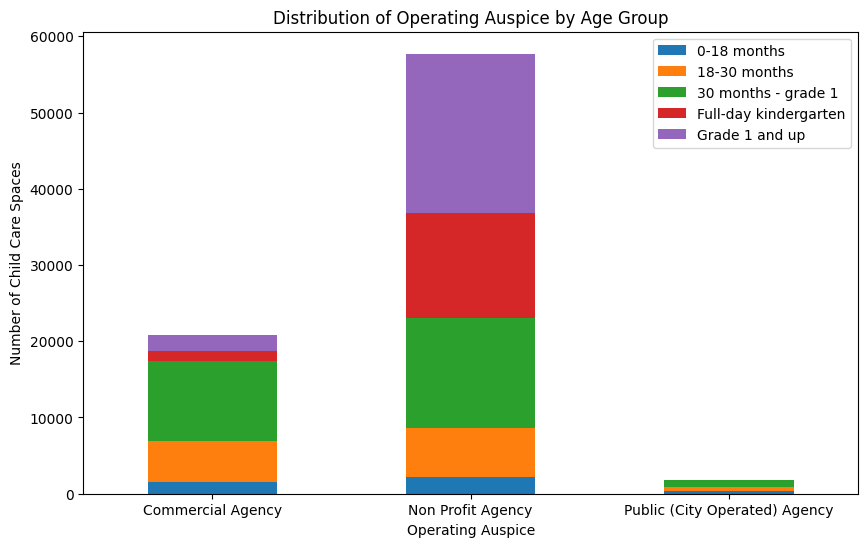

In [ ]:
# Group the data by type of operation and age group, and calculate the count for each combination
age_groups = ['IGSPACE', 'TGSPACE', 'PGSPACE', 'KGSPACE', 'SGSPACE']
age_group_labels = ['0-18 months', '18-30 months', '30 months - grade 1', 'Full-day kindergarten', 'Grade 1 and up']
auspice_age_groups = df.groupby('AUSPICE')[age_groups].sum()

# Draw a stacked bar chart
auspice_age_groups.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Distribution of Operating Auspice by Age Group')
plt.xlabel('Operating Auspice')
plt.ylabel('Number of Child Care Spaces')
plt.xticks(rotation=0)
plt.legend(labels=age_group_labels)
plt.show()

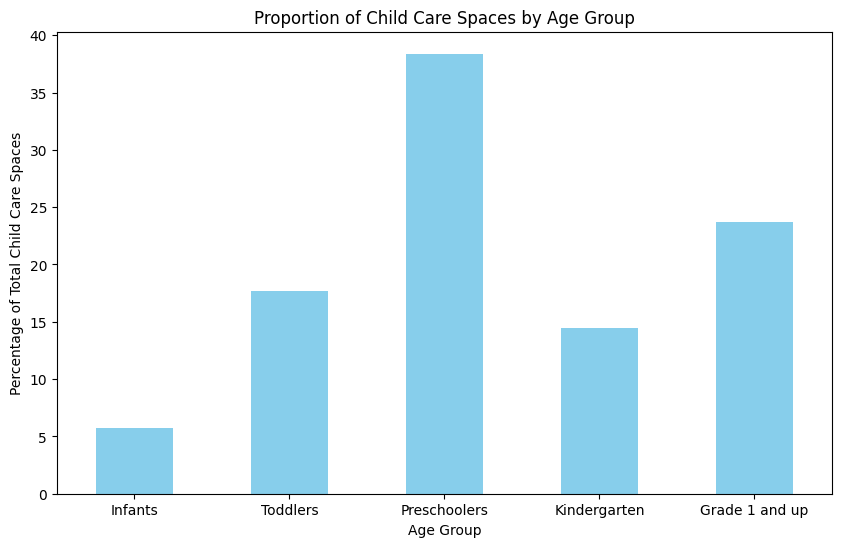

In [ ]:
# Calculate the proportion of hosting space for each age group to the total hosting space.
for age_group in age_groups:
    df[f'{age_group}_Percentage'] = df[age_group] / df['TOTSPACE'] * 100

# Extract the hosting space proportion for each age group.
age_group_percentages = df[[f'{age_group}_Percentage' for age_group in age_groups]]

# Draw a bar chart
age_group_percentages.mean().plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Proportion of Child Care Spaces by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Percentage of Total Child Care Spaces')
plt.xticks(range(len(age_groups)), ['Infants', 'Toddlers', 'Preschoolers', 'Kindergarten', 'Grade 1 and up'], rotation=0)
plt.show()

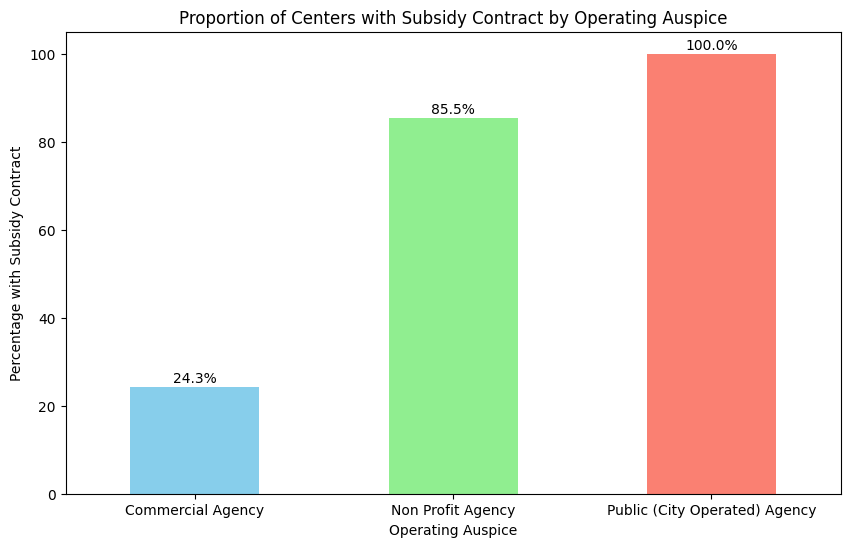

In [ ]:
# Group the centers by different business types, and calculate the number of centers in each group that have subsidy contracts
subsidy_counts_by_auspice = df.groupby('AUSPICE')['subsidy'].value_counts().unstack().fillna(0)

# Calculate the proportion of centers with subsidy contracts for each business type
subsidy_counts_by_auspice['Subsidized_Percentage'] = subsidy_counts_by_auspice['Y'] / (subsidy_counts_by_auspice['Y'] + subsidy_counts_by_auspice['N']) * 100

# Draw a bar chart
ax = subsidy_counts_by_auspice['Subsidized_Percentage'].plot(kind='bar', color=['skyblue', 'lightgreen', 'salmon'], figsize=(10, 6))
plt.title('Proportion of Centers with Subsidy Contract by Operating Auspice')
plt.xlabel('Operating Auspice')
plt.ylabel('Percentage with Subsidy Contract')
plt.xticks(rotation=0)

# Add specific numerical labels
for i, v in enumerate(subsidy_counts_by_auspice['Subsidized_Percentage']):
    ax.text(i, v + 1, f'{v:.1f}%', ha='center')

plt.show()

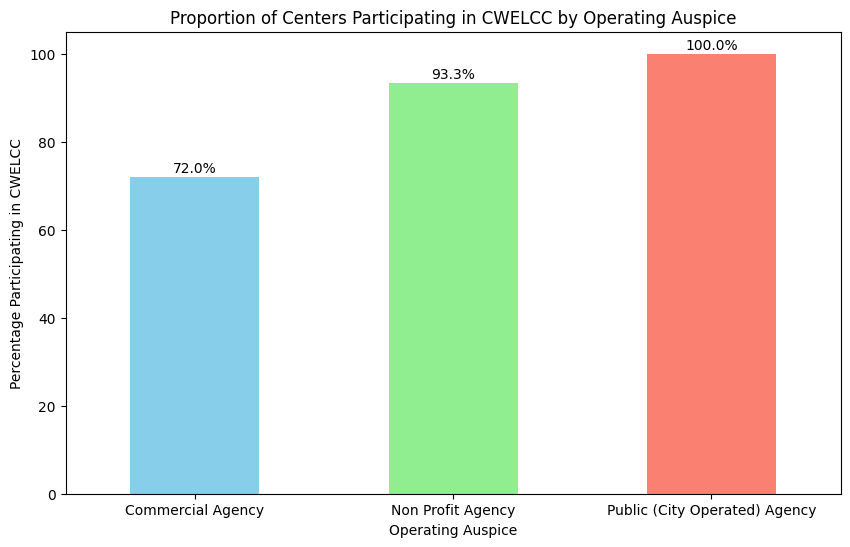

In [ ]:
# Group the centers by different types of businesses and calculate the number of centers participating in CWELCC in each group
cwelcc_counts_by_auspice = df.groupby('AUSPICE')['cwelcc_flag'].value_counts().unstack().fillna(0)

# Calculate the proportion of centers participating in CWELCC for each type of business
cwelcc_counts_by_auspice['CWELCC_Percentage'] = cwelcc_counts_by_auspice['Y'] / (cwelcc_counts_by_auspice['Y'] + cwelcc_counts_by_auspice['N']) * 100

# Draw a bar chart
ax = cwelcc_counts_by_auspice['CWELCC_Percentage'].plot(kind='bar', color=['skyblue', 'lightgreen', 'salmon'], figsize=(10, 6))
plt.title('Proportion of Centers Participating in CWELCC by Operating Auspice')
plt.xlabel('Operating Auspice')
plt.ylabel('Percentage Participating in CWELCC')
plt.xticks(rotation=0)

# Add specific numerical labels
for i, v in enumerate(cwelcc_counts_by_auspice['CWELCC_Percentage']):
    ax.text(i, v + 1, f'{v:.1f}%', ha='center')

plt.show()


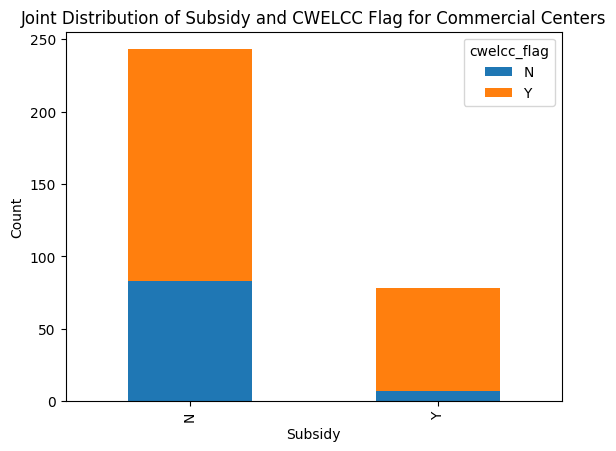

In [ ]:
# Subset the dataframe for centers with AUSPICE as commercial
commercial_centers = df[df['AUSPICE'] == 'Commercial Agency']

# Create a contingency table
contingency_table = pd.crosstab(index=commercial_centers['subsidy'], columns=commercial_centers['cwelcc_flag'])

# Plot the stacked bar plot
contingency_table.plot(kind='bar', stacked=True)

# Add labels and title
plt.xlabel('Subsidy')
plt.ylabel('Count')
plt.title('Joint Distribution of Subsidy and CWELCC Flag for Commercial Centers')

# Show the plot
plt.show()
